In [3]:
import pandas as pd
import math as m
from scipy import stats

# Questions For Investigation

## 1. What is our independent variable? What is our dependent variable?

The independent variable is different conceptual conditions. The dependent variable is response time.

## 2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

The population parameters are not given. So the t-test is a reasonable choice. According to the [Wikipedia article about Stroop effect](https://en.wikipedia.org/wiki/Stroop_effect), naming the ink of congruent stimuli is faster than the neutral condition by the *semantic facilitation*. By the way, the naming the ink of incongruent stimuli is slower than the neutral condition by the *semantic interference*. Therefore, I'll use a one-sided test of the hypothesis. The null and alternative hypothesis follow

* $H_0$: $\mu_c = \mu_i$ The time to say the color of the ink is the same for congruent and incongruent word set.
* $H_a$: $\mu_c < \mu_i$ The time to say the color of the ink of congruent word set is shorter than that of incongruent word set.

Also, the two conditions are measured repeatedly on paired samples. So I'll perform a dependent t-test for paired samples.

## 3. Report some descriptive statistics regarding this datasets. Include at least one measure of central tendency and at least one measure of variability.

First, read the data into DataFrame.

In [4]:
stroop = pd.read_csv("./stroopdata.csv")
stroop

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


The number of particiants is 24. The mean time of incongruent is larger than congruent condition as expected. I'll test the statistics whether this difference has a significant meaning.

In [9]:
stroop.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


## 4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

Every participant was slower when they name the incongruent word set.

Text(0,0.5,'Naming time (sec)')

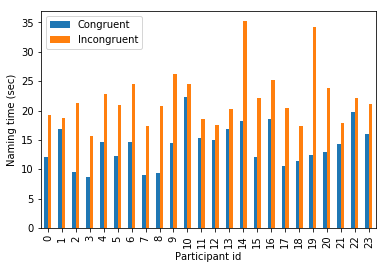

In [8]:
ax = stroop.plot(kind='bar')
ax.set_xlabel("Participant id")
ax.set_ylabel("Naming time (sec)")

The congruent and incongruent data have a mode at around 15 and 20 seconds, respectively.

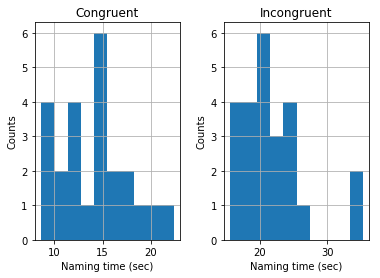

In [33]:
axarr = stroop.hist(bins=10)
for ax in axarr.flatten():
    ax.set_xlabel("Naming time (sec)")
    ax.set_ylabel("Counts")

The participant takes more time to name congruent word set, also take more time to name incongruent word set.

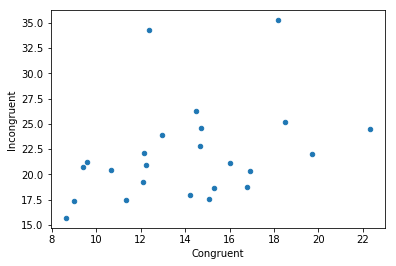

In [36]:
stroop.plot(kind='scatter', x='Congruent', y='Incongruent')

The data of congruent and incongruent has week correlation.

In [37]:
stroop.corr()

,Congruent,Incongruent
Congruent,1.00000,0.35182
Incongruent,0.35182,1.00000


## 5. Now, perform the statistical test and report your results. What are your confidence level and your critical static value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

The mean times of each condition are $\bar{t}_c=14.05$, $\bar{t}_i=22.02$.

In [38]:
stroop.mean()

Congruent      14.051125
Incongruent    22.015917
dtype: float64

The point estimate is $\mu_c - \mu_i = -7.96$.

In [44]:
stroop['Congruent'].mean() - stroop['Incongruent'].mean()

-7.964791666666665

The standard deviation of the differences is $S = 4.86$.

In [45]:
(stroop['Congruent'] - stroop['Incongruent']).std()

4.864826910359056

The t-statistic is $t=-8.02$.

In [47]:
(stroop['Congruent'].mean() - stroop['Incongruent'].mean()) / ((stroop['Congruent'] - stroop['Incongruent']).std() / m.sqrt(stroop.shape[0]))

-8.020706944109955

The p-value of this t-statistic is too small to find at t-table. However, we can still use a software from [GraphPad](https://www.graphpad.com/quickcalcs/pValue1/). With the degree of freedom, $\rm{df}=23$, it shows that the corresponding p-value is less than 0.0001. Therefor, we can reject the null with confidence interval of 99.9%.

The above procedure can be done with the following simple step. The p-value of the following result is for a two-tailed test, so the value should be halved to be used for the one-tailed test.

In [49]:
stats.ttest_rel(stroop['Congruent'], stroop['Incongruent'])

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.103000585711178e-08)

## 6. Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

According to the [Wikipedia article](https://en.wikipedia.org/wiki/Stroop_effect), there are several theories to explain the Stroop effect and are known as *race models*. This is based on that the two information are processed in parallel, but 'race' to enter the single central processor during response selection.

There are several variations of the Stroop effect. For example, the orientation and position of arrows consist of the interference information. Another example is the written number and size of that number.  